# 1. Import Data

In [39]:
!pip install pandas scikit-learn xgboost dill

  Using cached scikit_learn-1.3.2-cp38-cp38-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl.metadata (53 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp38-cp38-macosx_12_0_arm64.whl (9.4 MB)
Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Using cached dill-0.3.9-py3-none-any.whl (119 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("regressiondata.csv",index_col="ID")

In [42]:
df.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963


In [46]:
df.iloc[320]

(TransactionDate         2020.06
 HouseAge                   15.0
 DistanceToStation    1715.61405
 NumberOfPubs                2.0
 PostCode                 5212.0
 HousePrice               153989
 Name: 320, dtype: object,
 56136)

In [47]:
df.size

56136

# Split Data

In [48]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3, random_state=1234)

In [49]:
train.head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8450,2021.02,34.0,460.994365,8.0,5614.0,460286
5758,2020.01,17.0,614.851833,3.0,5213.0,253332
4030,2021.06,34.0,285.892687,9.0,5614.0,486532
8447,2020.12,0.0,195.213314,6.0,5222.0,595168
4370,2019.03,34.0,124.082230,8.0,5212.0,250495


# Data Analysis

In [50]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [51]:
train.iloc[0]['HousePrice']

'460286'

House price is a string which is not alright.
Post Code should be a category
Transaction Date is a float which is not good.

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6549 entries, 8450 to 8915
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6548 non-null   float64
 1   HouseAge           6546 non-null   float64
 2   DistanceToStation  6547 non-null   float64
 3   NumberOfPubs       6547 non-null   float64
 4   PostCode           6547 non-null   float64
 5   HousePrice         6544 non-null   object 
dtypes: float64(5), object(1)
memory usage: 358.1+ KB


In [53]:
# Create summary statistics
train.describe() # get statistics on numerical columns

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6548.000000,6546.000000,6547.000000,6.547000e+03,6547.000000
mean,2020.072389,17.375344,1091.759504,7.677828e+02,5294.499160
std,0.815922,11.469272,1270.038426,6.179430e+04,158.397718
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,268.649033,1.000000e+00,5213.000000
50%,2020.070000,15.000000,545.312168,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1529.343484,6.000000e+00,5222.000000
max,2021.120000,43.000000,6486.256457,4.999999e+06,5614.000000


In [54]:
# Type cast incorrect datatypes to new datatypes
train["PostCode"] = train["PostCode"].astype(str)
train["TransactionDate"] = train["TransactionDate"].astype(str)
# train["HousePrice"] = train["HousePrice"].astype(float)

In [56]:
# Create summary statistics for non-numeric features
train.describe(include="object")

,TransactionDate,PostCode,HousePrice
count,6549,6549,6544
unique,37,6,6496
top,2019.01,5212.0,290262
freq,212,1338,2


In [57]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.7 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.7 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.7-cp38-cp38-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl (3.4 MB)
Using cac

## Visualizations

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

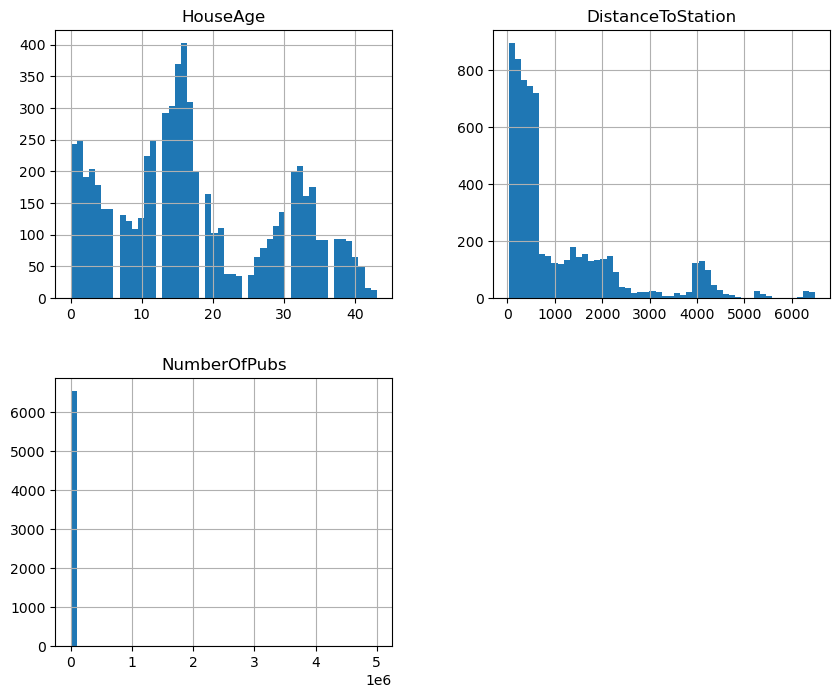

In [64]:
train.hist(figsize=(10,8), bins=50)
plt.show()

In [69]:
# Find the ?? in the dataset
train[train['HousePrice']=='??']

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [70]:
# Drop the rows that equal '??'
train = train[train['HousePrice']!='??']

In [73]:
train['HousePrice']=train['HousePrice'].astype(float)

In [76]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

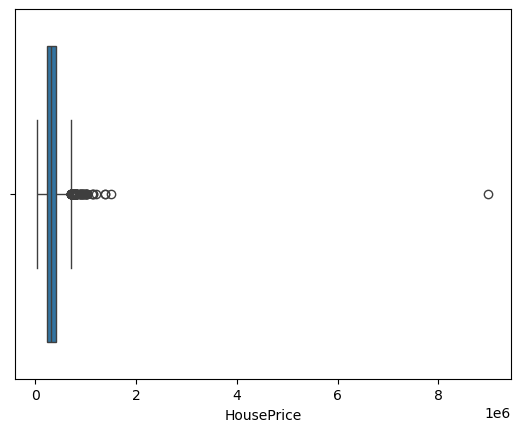

In [77]:
plt.title('Box Plot for House Price')
sns.boxplot(x=train['HousePrice'])
plt.show()

Wee see that we have an outlier
## Drop Outlier

In [82]:
# Find the outlier
train.sort_values('HousePrice').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
8103,2019.05,7.0,640.223538,10.0,5217.0,NaN
7673,nan,NaN,3830.892098,0.0,5217.0,NaN
32,2021.1,29.0,809.864711,8.0,5222.0,NaN
8112,2019.08,20.0,370.088151,NaN,nan,NaN


In [83]:
train = train.drop(8445)

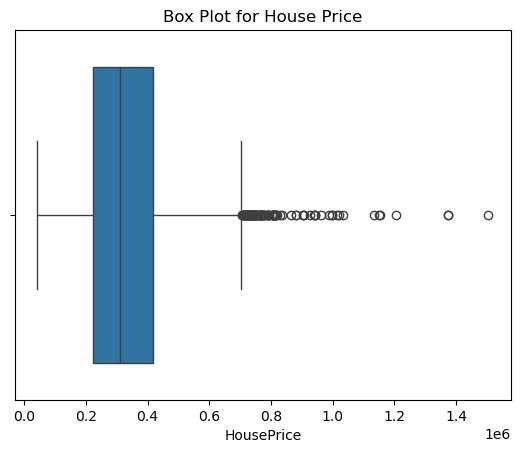

In [85]:
plt.title("Box Plot for House Price")
sns.boxplot(x=train['HousePrice'])
plt.show()

In [88]:
train.sort_values('NumberOfPubs').tail(10)

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
5334,2021.07,33.0,130.200701,10.0,5212.0,326772.0
4738,2021.11,34.0,42.324197,10.0,5614.0,518639.0
1046,2020.01,23.0,568.984852,10.0,5213.0,312165.0
6257,2019.01,34.0,98.166618,10.0,5222.0,489487.0
2916,2021.06,8.0,656.962289,10.0,5217.0,511688.0
422,2019.1,32.0,164.514773,10.0,5614.0,346126.0
5763,2020.02,33.0,326.339631,10.0,5222.0,555253.0
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
2416,2019.06,NaN,NaN,NaN,5222.0,268172.0


In [89]:
# Remove the outlier
train.drop(13, inplace=True) # equivalent to train = train.drop(13)